In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [0]:
import common_machine_learning as common
import pandas as pd
import numpy as np
import math

In [0]:
train = common.cargar_set_optimizado('/content/drive/My Drive/Colab Notebooks/sets_de_datos/dima_train_fill_0.csv')

In [0]:
X_test = common.cargar_set_optimizado('/content/drive/My Drive/Colab Notebooks/sets_de_datos/dima_test_fill_0.csv')

In [0]:
mega_set = train.drop(['precio'], axis = 1).append(X_test, ignore_index = True)

In [0]:
mega_set['servicios_cercanos'] = mega_set['escuelascercanas'].astype(int)  + mega_set['centroscomercialescercanos'].astype(int)
train['servicios_cercanos'] = train['escuelascercanas'].astype(int)  + train['centroscomercialescercanos'].astype(int)
X_test['servicios_cercanos'] = X_test['escuelascercanas'].astype(int)  + X_test['centroscomercialescercanos'].astype(int)

In [0]:
mega_set['utilidades_extra'] =\
  mega_set['gimnasio'].astype(int) + mega_set['usosmultiples'].astype(int) + mega_set['piscina'].astype(int)
train['utilidades_extra'] =\
  train['gimnasio'].astype(int) + train['usosmultiples'].astype(int) + train['piscina'].astype(int)
X_test['utilidades_extra'] =\
  X_test['gimnasio'].astype(int) + X_test['usosmultiples'].astype(int) + X_test['piscina'].astype(int)

In [0]:
out = mega_set.copy()
for col  in ['tipodepropiedad', 'ciudad', 'provincia']:
  for sub_col in ['antiguedad', 'habitaciones', 'garages', 'banos', 
                  'metroscubiertos', 'utilidades_extra', 'servicios_cercanos']:
    sub_col_mean_x_col =\
      mega_set.groupby([col]).agg({sub_col : 'mean'}).to_dict()
    
    out[col + '_mean_' + sub_col] =\
      out.apply(lambda x: sub_col_mean_x_col[sub_col].get(x[col], np.nan), 
                axis = 1)
mega_set = out.copy()

In [0]:
out = train.copy()
for col  in ['tipodepropiedad', 'ciudad', 'provincia']:
  for sub_col in ['antiguedad', 'habitaciones', 'garages', 'banos', 
                  'metroscubiertos', 'utilidades_extra', 'servicios_cercanos']:
    sub_col_mean_x_col =\
      mega_set.groupby([col]).agg({sub_col : 'mean'}).to_dict()
    
    out[col + '_mean_' + sub_col] =\
      out.apply(lambda x: sub_col_mean_x_col[sub_col].get(x[col], np.nan), 
                axis = 1)
train = out.copy()

In [0]:
out = X_test.copy()
for col  in ['tipodepropiedad', 'ciudad', 'provincia']:
  for sub_col in ['antiguedad', 'habitaciones', 'garages', 'banos', 
                  'metroscubiertos', 'utilidades_extra', 'servicios_cercanos']:
    sub_col_mean_x_col =\
      mega_set.groupby([col]).agg({sub_col : 'mean'}).to_dict()
    
    out[col + '_mean_' + sub_col] =\
      out.apply(lambda x: sub_col_mean_x_col[sub_col].get(x[col], np.nan), 
                axis = 1)
X_test = out.copy()

In [0]:
out = mega_set.copy()
lat_lng_mean_x_ciudad_x_provincia =\
  mega_set.groupby(['provincia', 'ciudad'])\
    .agg({'lat' : 'mean', 'lng' : 'mean'}).to_dict()

out['ciudad_mean_lat'] =\
  out.apply(lambda x: lat_lng_mean_x_ciudad_x_provincia['lat']\
                        .get((x['provincia'], x['ciudad']), np.nan), axis = 1)

out['ciudad_mean_lng'] =\
  out.apply(lambda x: lat_lng_mean_x_ciudad_x_provincia['lng']\
                        .get((x['provincia'], x['ciudad']), np.nan), axis = 1)
lat_lng_mean_x_provincia =\
  mega_set.groupby(['provincia'])\
      .agg({'lat' : 'mean', 'lng' : 'mean'}).to_dict()

out['provincia_mean_lat'] =\
  out.apply(lambda x: lat_lng_mean_x_provincia['lat']\
                        .get(x['provincia'], np.nan), axis = 1)
  
out['provincia_mean_lng'] =\
  out.apply(lambda x: lat_lng_mean_x_provincia['lng']\
                        .get(x['provincia'], np.nan), axis = 1)
mega_set = out.copy()

In [0]:
out = train.copy()
lat_lng_mean_x_ciudad_x_provincia =\
  mega_set.groupby(['provincia', 'ciudad'])\
    .agg({'lat' : 'mean', 'lng' : 'mean'}).to_dict()

out['ciudad_mean_lat'] =\
  out.apply(lambda x: lat_lng_mean_x_ciudad_x_provincia['lat']\
                        .get((x['provincia'], x['ciudad']), np.nan), axis = 1)

out['ciudad_mean_lng'] =\
  out.apply(lambda x: lat_lng_mean_x_ciudad_x_provincia['lng']\
                        .get((x['provincia'], x['ciudad']), np.nan), axis = 1)
lat_lng_mean_x_provincia =\
  mega_set.groupby(['provincia'])\
      .agg({'lat' : 'mean', 'lng' : 'mean'}).to_dict()

out['provincia_mean_lat'] =\
  out.apply(lambda x: lat_lng_mean_x_provincia['lat']\
                        .get(x['provincia'], np.nan), axis = 1)
  
out['provincia_mean_lng'] =\
  out.apply(lambda x: lat_lng_mean_x_provincia['lng']\
                        .get(x['provincia'], np.nan), axis = 1)
train = out.copy()

In [0]:
out = X_test.copy()
lat_lng_mean_x_ciudad_x_provincia =\
  mega_set.groupby(['provincia', 'ciudad'])\
    .agg({'lat' : 'mean', 'lng' : 'mean'}).to_dict()

out['ciudad_mean_lat'] =\
  out.apply(lambda x: lat_lng_mean_x_ciudad_x_provincia['lat']\
                        .get((x['provincia'], x['ciudad']), np.nan), axis = 1)

out['ciudad_mean_lng'] =\
  out.apply(lambda x: lat_lng_mean_x_ciudad_x_provincia['lng']\
                        .get((x['provincia'], x['ciudad']), np.nan), axis = 1)
lat_lng_mean_x_provincia =\
  mega_set.groupby(['provincia'])\
      .agg({'lat' : 'mean', 'lng' : 'mean'}).to_dict()

out['provincia_mean_lat'] =\
  out.apply(lambda x: lat_lng_mean_x_provincia['lat']\
                        .get(x['provincia'], np.nan), axis = 1)
  
out['provincia_mean_lng'] =\
  out.apply(lambda x: lat_lng_mean_x_provincia['lng']\
                        .get(x['provincia'], np.nan), axis = 1)
X_test = out.copy()

In [0]:
out = mega_set.copy()
out['coseno_distancia_angular_al_centro_ciudad'] = out.apply(lambda x: x['lat']*x['ciudad_mean_lat'] + x['lng']*x['ciudad_mean_lng'], axis =1)  
out['coseno_distancia_angular_al_centro_provincia'] = out.apply(lambda x: x['lat']*x['provincia_mean_lat'] + x['lng']*x['provincia_mean_lng'], axis = 1) 
out['coseno_distancia_angular_al_centro_pais'] = out.apply(lambda x: x['lat']*23.062283 + x['lng']*-109.699951, axis = 1)
mega_set = out.copy()

In [0]:
out = train.copy()
out['coseno_distancia_angular_al_centro_ciudad'] = out.apply(lambda x: x['lat']*x['ciudad_mean_lat'] + x['lng']*x['ciudad_mean_lng'], axis =1)  
out['coseno_distancia_angular_al_centro_provincia'] = out.apply(lambda x: x['lat']*x['provincia_mean_lat'] + x['lng']*x['provincia_mean_lng'], axis = 1) 
out['coseno_distancia_angular_al_centro_pais'] = out.apply(lambda x: x['lat']*23.062283 + x['lng']*-109.699951, axis = 1)
train = out.copy()

In [0]:
out = X_test.copy()
out['coseno_distancia_angular_al_centro_ciudad'] = out.apply(lambda x: x['lat']*x['ciudad_mean_lat'] + x['lng']*x['ciudad_mean_lng'], axis =1)  
out['coseno_distancia_angular_al_centro_provincia'] = out.apply(lambda x: x['lat']*x['provincia_mean_lat'] + x['lng']*x['provincia_mean_lng'], axis = 1) 
out['coseno_distancia_angular_al_centro_pais'] = out.apply(lambda x: x['lat']*23.062283 + x['lng']*-109.699951, axis = 1)
X_test = out.copy()

In [0]:
mega_set['año'] = mega_set['fecha'].dt.year
mega_set['mes'] = mega_set['fecha'].dt.month
mega_set['dia'] = mega_set['fecha'].dt.day

In [0]:
train['año'] = train['fecha'].dt.year
train['mes'] = train['fecha'].dt.month
train['dia'] = train['fecha'].dt.day

In [0]:
X_test['año'] = X_test['fecha'].dt.year
X_test['mes'] = X_test['fecha'].dt.month
X_test['dia'] = X_test['fecha'].dt.day

In [0]:
def metros_no_cubiertos(m_totales, m_cubiertos):
    if m_cubiertos >= m_totales:
        return 0
    return m_totales - m_cubiertos
    

mega_set['metros_no_cubiertos'] =\
    mega_set.apply(lambda x: metros_no_cubiertos(x['metrostotales'], x['metroscubiertos']), axis = 1)
train['metros_no_cubiertos'] =\
    train.apply(lambda x: metros_no_cubiertos(x['metrostotales'], x['metroscubiertos']), axis = 1)
X_test['metros_no_cubiertos'] =\
    X_test.apply(lambda x: metros_no_cubiertos(x['metrostotales'], x['metroscubiertos']), axis = 1)

In [0]:
def cantidad_espacios(df):
    cantidad_espacios = 0
    for col in ['habitaciones', 'garages', 'banos', 'gimnasio', 'usosmultiples', 'piscina']:
        cantidad_espacios += int(df[col])
    return cantidad_espacios

mega_set['cantidad_espacios'] = mega_set.apply(cantidad_espacios, axis = 1)
train['cantidad_espacios'] = train.apply(cantidad_espacios, axis = 1)
X_test['cantidad_espacios'] = X_test.apply(cantidad_espacios, axis = 1)

In [0]:
def metros_x_espacio(cantidad_espacios, metros_cubiertos):
    if cantidad_espacios <= 0 or metros_cubiertos <= 0:
        return 0
    return metros_cubiertos / cantidad_espacios

mega_set['metros_x_espacio'] =\
  mega_set.apply(lambda x: metros_x_espacio(x['cantidad_espacios'], x['metroscubiertos']), axis = 1)
train['metros_x_espacio'] =\
  train.apply(lambda x: metros_x_espacio(x['cantidad_espacios'], x['metroscubiertos']), axis = 1)
X_test['metros_x_espacio'] =\
  X_test.apply(lambda x: metros_x_espacio(x['cantidad_espacios'], x['metroscubiertos']), axis = 1)

In [0]:
def metros_en_varios_espacios(repeticiones_espacio, metros_x_espacio):
    if repeticiones_espacio <= 0 or metros_x_espacio <= 0:
        return 0
    return repeticiones_espacio * metros_x_espacio

for col in ['habitaciones', 'garages', 'banos', 'utilidades_extra']:
    mega_set['metros_x_' + col] =\
        mega_set.apply(lambda x: metros_en_varios_espacios(x[col], x['metros_x_espacio']), axis = 1)
for col in ['habitaciones', 'garages', 'banos', 'utilidades_extra']:
    train['metros_x_' + col] =\
        train.apply(lambda x: metros_en_varios_espacios(x[col], x['metros_x_espacio']), axis = 1)
for col in ['habitaciones', 'garages', 'banos', 'utilidades_extra']:
    X_test['metros_x_' + col] =\
        X_test.apply(lambda x: metros_en_varios_espacios(x[col], x['metros_x_espacio']), axis = 1)

In [0]:
mega_set['ratio_metros_cubiertos'] = mega_set['metroscubiertos'] / mega_set['metrostotales']
mega_set['ratio_metros_cubiertos'] = mega_set['ratio_metros_cubiertos'].transform(lambda x: x if x < 1 else 1)
mega_set['ratio_metros_cubiertos'] = mega_set['ratio_metros_cubiertos'].transform(lambda x: x if x > 0 else 0)

In [0]:
train['ratio_metros_cubiertos'] = train['metroscubiertos'] / mega_set['metrostotales']
train['ratio_metros_cubiertos'] = train['ratio_metros_cubiertos'].transform(lambda x: x if x < 1 else 1)
train['ratio_metros_cubiertos'] = train['ratio_metros_cubiertos'].transform(lambda x: x if x > 0 else 0)

In [0]:
X_test['ratio_metros_cubiertos'] = X_test['metroscubiertos'] / mega_set['metrostotales']
X_test['ratio_metros_cubiertos'] = X_test['ratio_metros_cubiertos'].transform(lambda x: x if x < 1 else 1)
X_test['ratio_metros_cubiertos'] = X_test['ratio_metros_cubiertos'].transform(lambda x: x if x > 0 else 0)

In [0]:
train.shape

(240000, 64)

In [0]:
X_test.shape

(60000, 63)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train.set_index('id', inplace = True)
X_test.set_index('id', inplace = True)

In [0]:
TARGET = 'precio'
FEATURES = ['antiguedad', 'habitaciones', 'garages', 'banos',
            'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng',
            'servicios_cercanos', 'utilidades_extra',
            'tipodepropiedad_mean_antiguedad', 'tipodepropiedad_mean_habitaciones',
            'tipodepropiedad_mean_garages', 'tipodepropiedad_mean_banos',
            'tipodepropiedad_mean_metroscubiertos',
            'tipodepropiedad_mean_utilidades_extra',
            'tipodepropiedad_mean_servicios_cercanos', 'ciudad_mean_antiguedad',
            'ciudad_mean_habitaciones', 'ciudad_mean_garages', 'ciudad_mean_banos',
            'ciudad_mean_metroscubiertos', 'ciudad_mean_utilidades_extra',
            'ciudad_mean_servicios_cercanos', 'provincia_mean_antiguedad',
            'provincia_mean_habitaciones', 'provincia_mean_garages',
            'provincia_mean_banos', 'provincia_mean_metroscubiertos',
            'provincia_mean_utilidades_extra', 'provincia_mean_servicios_cercanos',
            'ciudad_mean_lat', 'ciudad_mean_lng', 'provincia_mean_lat',
            'provincia_mean_lng',
            'coseno_distancia_angular_al_centro_ciudad',
            'coseno_distancia_angular_al_centro_provincia',
            'coseno_distancia_angular_al_centro_pais', 'año', 'mes', 'dia',
            'metros_no_cubiertos', 'cantidad_espacios', 'metros_x_espacio',
            'metros_x_habitaciones', 'metros_x_garages', 'metros_x_banos',
            'metros_x_utilidades_extra', 'ratio_metros_cubiertos']

In [0]:
def evaluar_modelo(modelo, XX_test, y_test):
    y_pred = modelo.predict(XX_test)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Performance del modelo:')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [0]:
X_train, XX_test, y_train, y_test = train_test_split(train[FEATURES], train[TARGET], test_size=0.2, random_state=1)

In [0]:
params = {'max_depth': 15, 'max_features': 5, 'n_estimators': 200}
rf_regressor = RandomForestRegressor(**params)

In [0]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test, y_test)

Performance del modelo:
Average Error: 604728.0756 degrees.
Accuracy = 69.17%.


69.17305708469237

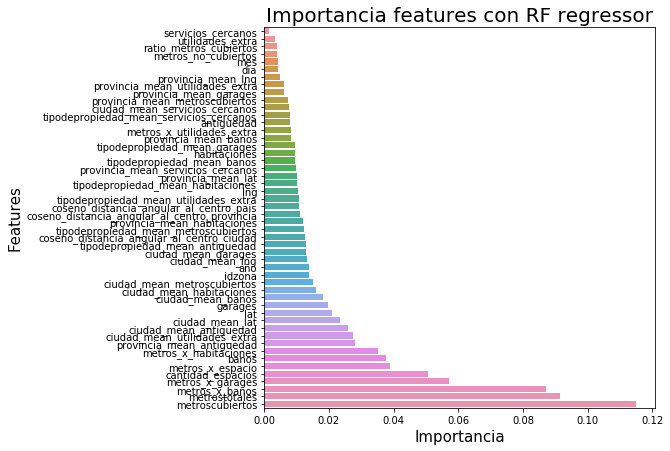

In [0]:
feature_nombres = X_train.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
# Elimino metrostotales y metroscubiertos
FEATURES_2 = ['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'lat', 
              'lng', 'servicios_cercanos', 'utilidades_extra',
              'tipodepropiedad_mean_antiguedad', 'tipodepropiedad_mean_habitaciones',
              'tipodepropiedad_mean_garages', 'tipodepropiedad_mean_banos',
              'tipodepropiedad_mean_metroscubiertos',
              'tipodepropiedad_mean_utilidades_extra',
              'tipodepropiedad_mean_servicios_cercanos', 'ciudad_mean_antiguedad',
              'ciudad_mean_habitaciones', 'ciudad_mean_garages', 'ciudad_mean_banos',
              'ciudad_mean_metroscubiertos', 'ciudad_mean_utilidades_extra',
              'ciudad_mean_servicios_cercanos', 'provincia_mean_antiguedad',
              'provincia_mean_habitaciones', 'provincia_mean_garages',
              'provincia_mean_banos', 'provincia_mean_metroscubiertos',
              'provincia_mean_utilidades_extra', 'provincia_mean_servicios_cercanos',
              'ciudad_mean_lat', 'ciudad_mean_lng', 'provincia_mean_lat',
              'provincia_mean_lng',
              'coseno_distancia_angular_al_centro_ciudad',
              'coseno_distancia_angular_al_centro_provincia',
              'coseno_distancia_angular_al_centro_pais', 'año', 'mes', 'dia',
              'metros_no_cubiertos', 'cantidad_espacios', 'metros_x_espacio',
              'metros_x_habitaciones', 'metros_x_garages', 'metros_x_banos',
              'metros_x_utilidades_extra', 'ratio_metros_cubiertos']

In [0]:
X_train_2, XX_test_2, y_train_2, y_test_2 = train_test_split(train[FEATURES_2], train[TARGET], test_size=0.2, random_state=2)

In [0]:
rf_regressor.fit(X_train_2, y_train_2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_2, y_test_2)

Performance del modelo:
Average Error: 640107.7540 degrees.
Accuracy = 67.90%.


67.90153492963609

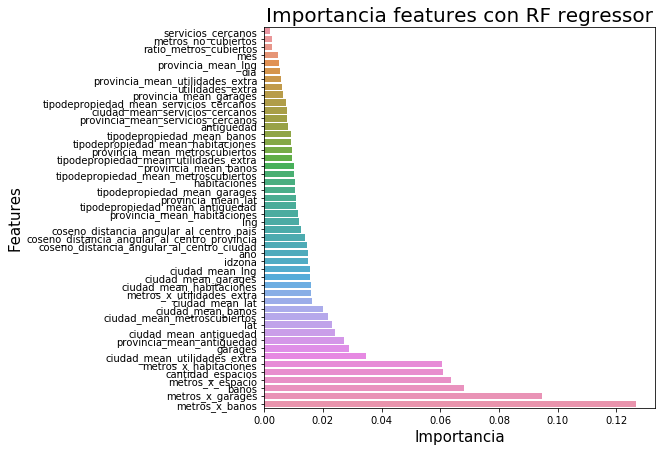

In [0]:
feature_nombres = X_train_2.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
# Elimino metrostotales y metroscubiertos, metros_x_banos, metros_x_garages
FEATURES_3 = ['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'lat', 
              'lng', 'servicios_cercanos', 'utilidades_extra',
              'tipodepropiedad_mean_antiguedad', 'tipodepropiedad_mean_habitaciones',
              'tipodepropiedad_mean_garages', 'tipodepropiedad_mean_banos',
              'tipodepropiedad_mean_metroscubiertos',
              'tipodepropiedad_mean_utilidades_extra',
              'tipodepropiedad_mean_servicios_cercanos', 'ciudad_mean_antiguedad',
              'ciudad_mean_habitaciones', 'ciudad_mean_garages', 'ciudad_mean_banos',
              'ciudad_mean_metroscubiertos', 'ciudad_mean_utilidades_extra',
              'ciudad_mean_servicios_cercanos', 'provincia_mean_antiguedad',
              'provincia_mean_habitaciones', 'provincia_mean_garages',
              'provincia_mean_banos', 'provincia_mean_metroscubiertos',
              'provincia_mean_utilidades_extra', 'provincia_mean_servicios_cercanos',
              'ciudad_mean_lat', 'ciudad_mean_lng', 'provincia_mean_lat',
              'provincia_mean_lng',
              'coseno_distancia_angular_al_centro_ciudad',
              'coseno_distancia_angular_al_centro_provincia',
              'coseno_distancia_angular_al_centro_pais', 'año', 'mes', 'dia',
              'metros_no_cubiertos', 'cantidad_espacios', 'metros_x_espacio',
              'metros_x_habitaciones',
              'metros_x_utilidades_extra', 'ratio_metros_cubiertos']

In [0]:
X_train_3, XX_test_3, y_train_3, y_test_3 = train_test_split(train[FEATURES_3], train[TARGET], test_size=0.2, random_state=3)

In [0]:
rf_regressor.fit(X_train_3, y_train_3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_3, y_test_3)

Performance del modelo:
Average Error: 657030.6145 degrees.
Accuracy = 66.61%.


66.60660914729002

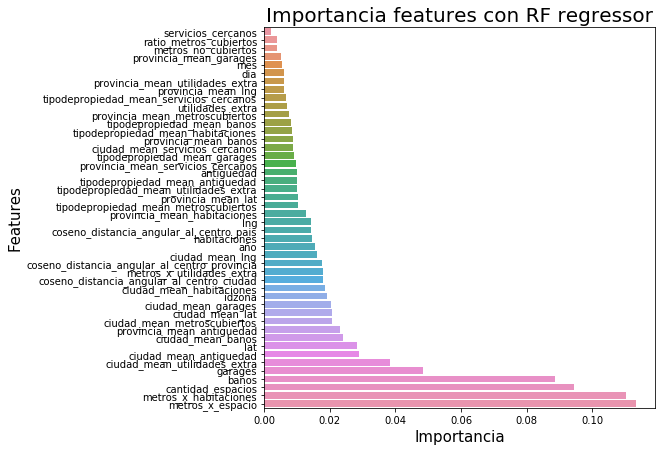

In [0]:
feature_nombres = X_train_3.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
# Elimino ['servicios_cercanos', 'metros_no_cubiertos', 'utilidades_extra', 'mes', 'ratio_metros_cubiertos', 'dia']
drop_features = ['servicios_cercanos', 'metros_no_cubiertos', 'utilidades_extra', 'mes', 'ratio_metros_cubiertos', 'dia']
FEATURES_4 = list(set(FEATURES) - set(drop_features))

In [0]:
X_train_4, XX_test_4, y_train_4, y_test_4 = train_test_split(train[FEATURES_4], train[TARGET], test_size=0.2, random_state=4)

In [0]:
rf_regressor.fit(X_train_4, y_train_4)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_4, y_test_4)

Performance del modelo:
Average Error: 611451.6330 degrees.
Accuracy = 69.59%.


69.59398669193277

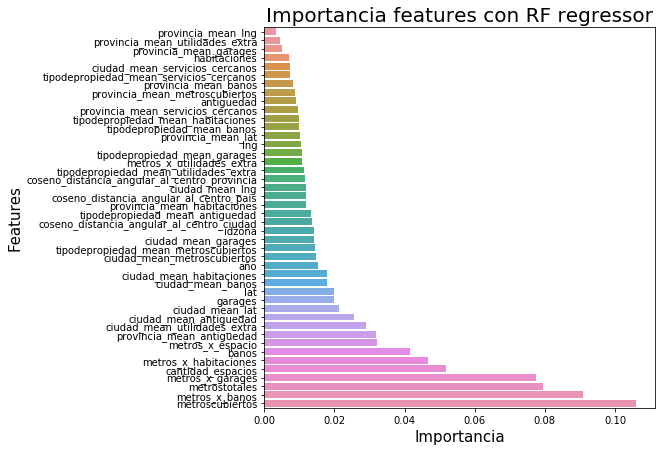

In [0]:
feature_nombres = X_train_4.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
# Elimino ['servicios_cercanos', 'metros_no_cubiertos', 'utilidades_extra', 'mes', 'ratio_metros_cubiertos', 'dia', 'provincia_mean_lng', 'provincia_mean_utilidades_extra', 'provincia_mean_garages']
drop_features = ['servicios_cercanos', 'metros_no_cubiertos', 'utilidades_extra', 'mes', 'ratio_metros_cubiertos', 'dia', 'provincia_mean_lng', 'provincia_mean_utilidades_extra', 'provincia_mean_garages']
FEATURES_5 = list(set(FEATURES) - set(drop_features))

In [0]:
X_train_5, XX_test_5, y_train_5, y_test_5 = train_test_split(train[FEATURES_5], train[TARGET], test_size=0.2, random_state=5)

In [0]:
rf_regressor.fit(X_train_5, y_train_5)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_5, y_test_5)

Performance del modelo:
Average Error: 612057.9658 degrees.
Accuracy = 69.42%.


69.4170624644242

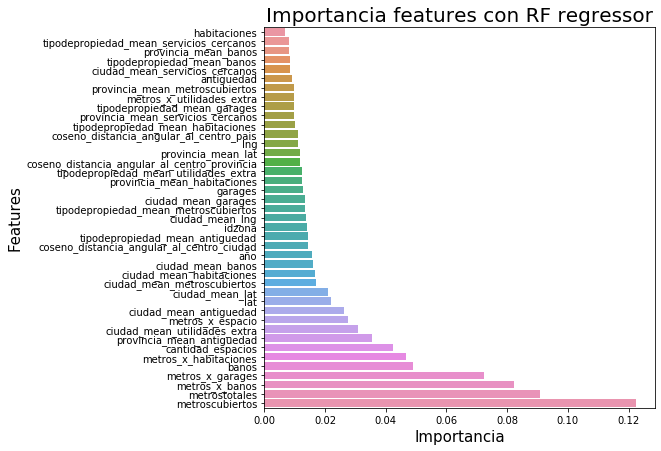

In [0]:
feature_nombres = X_train_5.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
drop_features = ['metroscubiertos', 'metros_no_cubiertos', 'mes', 'dia', 'lat', 'lng']
FEATURES_6 = list(set(FEATURES) - set(drop_features))

In [0]:
X_train_6, XX_test_6, y_train_6, y_test_6 = train_test_split(train[FEATURES_6], train[TARGET], test_size=0.2, random_state=6)

In [0]:
rf_regressor.fit(X_train_6, y_train_6)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_6, y_test_6)

Performance del modelo:
Average Error: 611910.9060 degrees.
Accuracy = 69.39%.


69.38948970376485

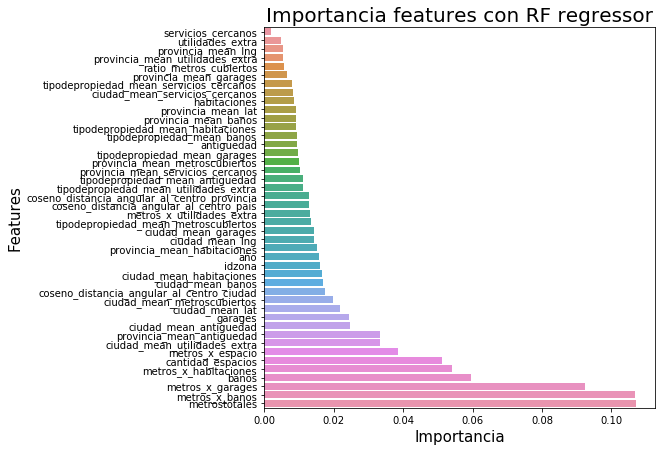

In [0]:
feature_nombres = X_train_6.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
drop_features = ['metroscubiertos', 'metros_no_cubiertos', 'mes', 'dia', 'lat', 
                 'lng','servicios_cercanos', 'utilidades_extra', 
                 'provincia_mean_lng', 'provincia_mean_utilidades_extra', 
                 'ratio_metros_cubiertos', 'provincia_mean_garages', 
                 'tipodepropiedad_mean_servicios_cercanos', 
                 'ciudad_mean_servicios_cercanos', 'habitaciones', 
                 'provincia_mean_lat', 'provincia_mean_banos', 
                 'tipodepropiedad_mean_habitaciones', 'tipodepropiedad_mean_banos', 
                 'antiguedad']
FEATURES_7 = list(set(FEATURES) - set(drop_features))


In [0]:
X_train_7, XX_test_7, y_train_7, y_test_7 = train_test_split(train[FEATURES_7], train[TARGET], test_size=0.2, random_state=7)

In [0]:
rf_regressor.fit(X_train_7, y_train_7)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_7, y_test_7)

Performance del modelo:
Average Error: 611768.8221 degrees.
Accuracy = 69.46%.


69.45683407008924

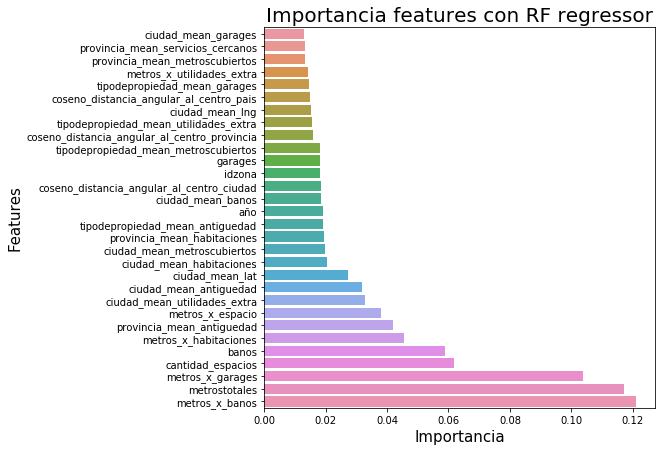

In [0]:
feature_nombres = X_train_7.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
drop_features = ['metroscubiertos', 'metros_no_cubiertos', 'mes', 'dia', 'lat', 
                 'lng','servicios_cercanos', 'utilidades_extra', 
                 'provincia_mean_lng', 'provincia_mean_utilidades_extra', 
                 'ratio_metros_cubiertos', 'provincia_mean_garages', 
                 'tipodepropiedad_mean_servicios_cercanos', 
                 'ciudad_mean_servicios_cercanos', 'habitaciones', 
                 'provincia_mean_lat', 'provincia_mean_banos', 
                 'tipodepropiedad_mean_habitaciones', 'tipodepropiedad_mean_banos', 
                 'antiguedad', 'metros_x_banos', 'metrostotales', 'metros_x_garages']
FEATURES_8 = list(set(FEATURES) - set(drop_features))

In [0]:
X_train_8, XX_test_8, y_train_8, y_test_8 = train_test_split(train[FEATURES_8], train[TARGET], test_size=0.2, random_state=8)

In [0]:
rf_regressor.fit(X_train_8, y_train_8)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_8, y_test_8)

Performance del modelo:
Average Error: 642054.1849 degrees.
Accuracy = 68.12%.


68.11829192556316

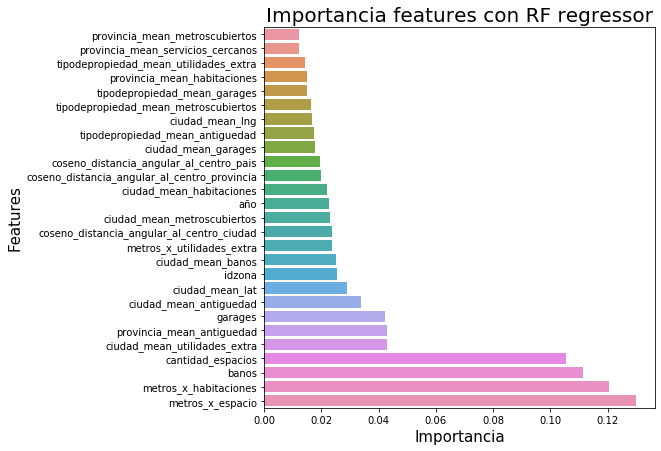

In [0]:
feature_nombres = X_train_8.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
drop_features = ['metroscubiertos', 'metros_no_cubiertos', 'mes', 'dia', 'lat', 
                 'lng','servicios_cercanos', 'utilidades_extra', 
                 'provincia_mean_lng', 'provincia_mean_utilidades_extra', 
                 'ratio_metros_cubiertos', 'provincia_mean_garages', 
                 'tipodepropiedad_mean_servicios_cercanos', 
                 'ciudad_mean_servicios_cercanos', 'habitaciones', 
                 'provincia_mean_lat', 'provincia_mean_banos', 
                 'tipodepropiedad_mean_habitaciones', 'tipodepropiedad_mean_banos', 
                 'antiguedad', 'metros_x_banos', 'metrostotales', 'metros_x_garages',
                 'metros_x_espacio','metros_x_habitaciones','cantidad_espacios', 'banos']
FEATURES_9 = list(set(FEATURES) - set(drop_features))

In [0]:
X_train_9, XX_test_9, y_train_9, y_test_9 = train_test_split(train[FEATURES_9], train[TARGET], test_size=0.2, random_state=9)

In [0]:
rf_regressor.fit(X_train_9, y_train_9)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_9, y_test_9)

Performance del modelo:
Average Error: 886832.7298 degrees.
Accuracy = 49.04%.


49.04315670689536

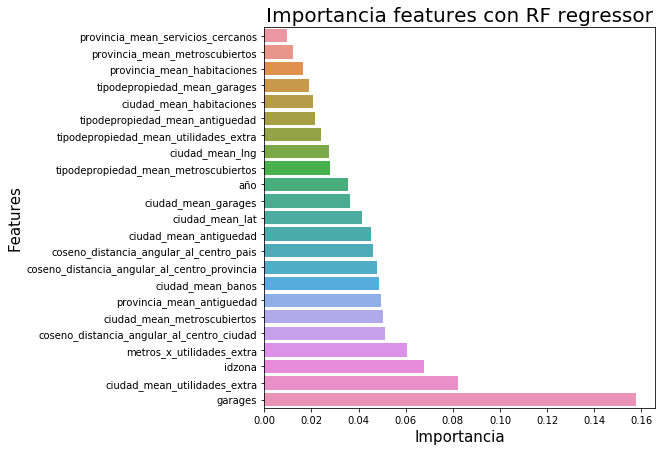

In [0]:
feature_nombres = X_train_9.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
drop_features = ['metros_no_cubiertos', 'mes', 'dia', 
                 'servicios_cercanos', 'utilidades_extra', 
                 'provincia_mean_lng', 'provincia_mean_utilidades_extra', 
                 'ratio_metros_cubiertos', 'provincia_mean_garages', 
                 'tipodepropiedad_mean_servicios_cercanos', 
                 'ciudad_mean_servicios_cercanos', 'habitaciones', 
                 'provincia_mean_lat', 'provincia_mean_banos', 
                 'tipodepropiedad_mean_habitaciones', 'tipodepropiedad_mean_banos', 
                 'antiguedad']
FEATURES_10 = list(set(FEATURES) - set(drop_features))

In [0]:
X_train_10, XX_test_10, y_train_10, y_test_10 = train_test_split(train[FEATURES_10], train[TARGET], test_size=0.2, random_state=10)

In [0]:
rf_regressor.fit(X_train_10, y_train_10)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
evaluar_modelo(rf_regressor, XX_test_10, y_test_10)

Performance del modelo:
Average Error: 607160.8711 degrees.
Accuracy = 69.48%.


69.47822030547974

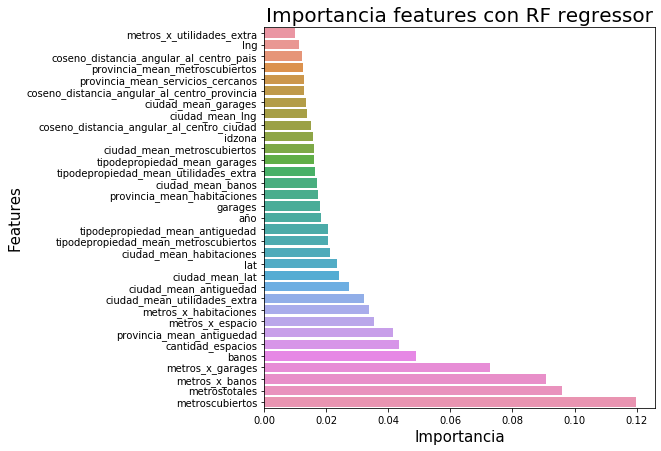

In [0]:
feature_nombres = X_train_10.columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
rf_regressor.fit(train[FEATURES_10], train[TARGET])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_kaggle_pred = rf_regressor.predict(X_test[FEATURES_10])

In [0]:
res = pd.DataFrame(y_kaggle_pred, index=X_test.index, columns=['target'])
res.to_csv("/content/drive/My Drive/Colab Notebooks/sets_de_datos/dima_submit_rf_fe_2.csv", header=True)

In [0]:
train.to_csv("/content/drive/My Drive/Colab Notebooks/sets_de_datos/dima_train_with_features_2.csv")
X_test.to_csv("/content/drive/My Drive/Colab Notebooks/sets_de_datos/dima_test_with_features_2.csv")

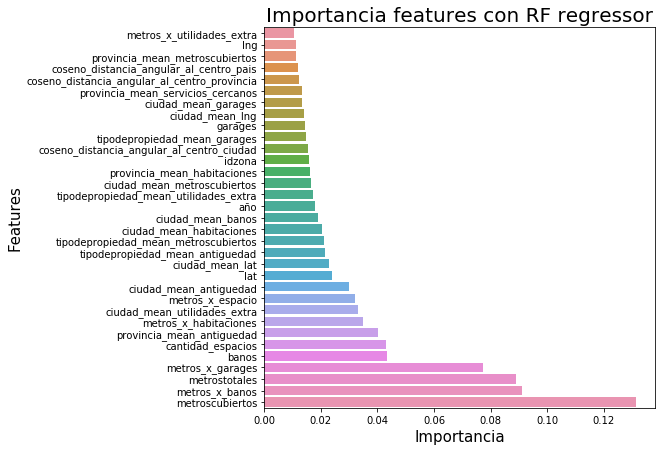

In [0]:
feature_nombres = train[FEATURES_10].columns
feature_importancias = rf_regressor.feature_importances_ 
indices_importancia = np.argsort(feature_importancias)
plot = sns.barplot(
            y = feature_nombres[indices_importancia],
            x = feature_importancias[indices_importancia],
        )

plot.set_xlabel('Importancia', fontsize = 15)
plot.set_ylabel('Features', fontsize = 15)
plot.set_title('Importancia features con RF regressor', fontsize = 20)
fig = plot.get_figure()
fig.set_size_inches(7,7)

plt.show()

In [0]:
feature_nombres[indices_importancia]

Index(['metros_x_utilidades_extra', 'lng', 'provincia_mean_metroscubiertos',
       'coseno_distancia_angular_al_centro_pais',
       'coseno_distancia_angular_al_centro_provincia',
       'provincia_mean_servicios_cercanos', 'ciudad_mean_garages',
       'ciudad_mean_lng', 'garages', 'tipodepropiedad_mean_garages',
       'coseno_distancia_angular_al_centro_ciudad', 'idzona',
       'provincia_mean_habitaciones', 'ciudad_mean_metroscubiertos',
       'tipodepropiedad_mean_utilidades_extra', 'año', 'ciudad_mean_banos',
       'ciudad_mean_habitaciones', 'tipodepropiedad_mean_metroscubiertos',
       'tipodepropiedad_mean_antiguedad', 'ciudad_mean_lat', 'lat',
       'ciudad_mean_antiguedad', 'metros_x_espacio',
       'ciudad_mean_utilidades_extra', 'metros_x_habitaciones',
       'provincia_mean_antiguedad', 'cantidad_espacios', 'banos',
       'metros_x_garages', 'metrostotales', 'metros_x_banos',
       'metroscubiertos'],
      dtype='object')

In [0]:
pd.read_csv("/content/drive/My Drive/Colab Notebooks/sets_de_datos/dima_train_with_features_2.csv")

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,servicios_cercanos,utilidades_extra,tipodepropiedad_mean_antiguedad,tipodepropiedad_mean_habitaciones,tipodepropiedad_mean_garages,tipodepropiedad_mean_banos,tipodepropiedad_mean_metroscubiertos,tipodepropiedad_mean_utilidades_extra,tipodepropiedad_mean_servicios_cercanos,ciudad_mean_antiguedad,ciudad_mean_habitaciones,ciudad_mean_garages,ciudad_mean_banos,ciudad_mean_metroscubiertos,ciudad_mean_utilidades_extra,ciudad_mean_servicios_cercanos,provincia_mean_antiguedad,provincia_mean_habitaciones,provincia_mean_garages,provincia_mean_banos,provincia_mean_metroscubiertos,provincia_mean_utilidades_extra,provincia_mean_servicios_cercanos,ciudad_mean_lat,ciudad_mean_lng,provincia_mean_lat,provincia_mean_lng,coseno_distancia_angular_al_centro_ciudad,coseno_distancia_angular_al_centro_provincia,coseno_distancia_angular_al_centro_pais,año,mes,dia,metros_no_cubiertos,cantidad_espacios,metros_x_espacio,metros_x_habitaciones,metros_x_garages,metros_x_banos,metros_x_utilidades_extra,ratio_metros_cubiertos
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.365699,-99.159268,2015-08-23,False,False,False,False,False,2273000.0,0,0,7.417969,2.382812,1.422852,1.812500,117.1875,0.381455,0.912149,9.265625,2.605469,1.392578,1.913086,131.3750,0.133931,0.957307,11.375000,2.794922,1.444336,1.993164,162.000,0.187002,0.923358,19.359203,-98.857707,19.374191,-98.868538,10177.562384,10178.926625,11324.384071,2015,8,23,0.0,5,16.000000,32.000000,16.000000,32.000000,0.000000,1.000000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3600000.0,2,0,5.777344,2.958984,1.919922,2.363281,189.8750,0.321134,0.961542,11.687500,3.025391,1.867188,2.519531,239.1250,0.098823,0.747267,11.375000,2.794922,1.444336,1.993164,162.000,0.187002,0.923358,19.326636,-98.705763,19.374191,-98.868538,10167.542694,10184.612768,11330.606270,2013,6,28,0.0,7,38.285714,114.857143,76.571429,76.571429,0.000000,1.000000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,20.667749,-103.211481,2015-10-17,False,False,False,False,False,1200000.0,0,0,7.363281,3.089844,1.740234,2.242188,197.6250,0.143915,0.841072,5.425781,2.691406,1.265625,1.659180,110.4375,0.046602,0.737864,6.082031,2.998047,1.532227,2.140625,178.750,0.265899,0.933168,20.848491,-103.775975,20.680579,-103.252592,11141.763485,11084.274001,11798.939886,2015,10,17,22.0,7,20.571429,61.714286,41.142857,41.142857,0.000000,0.867676
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,650000.0,2,0,7.363281,3.089844,1.740234,2.242188,197.6250,0.143915,0.841072,3.355469,2.794922,1.696289,1.926758,168.8750,0.089005,1.068063,9.812500,3.003906,1.669922,2.066406,186.375,0.203351,1.056382,19.608811,-100.454412,19.534312,-98.939500,10392.588009,10240.131545,11380.916019,2012,3,9,4.0,4,15.750000,31.500000,15.750000,15.750000,0.000000,0.940430
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,20.638602,-103.432520,2016-06-07,False,False,False,False,False,1150000.0,0,0,7.417969,2.382812,1.422852,1.812500,117.1875,0.381455,0.912149,5.156250,3.011719,1.67089